<a href="https://colab.research.google.com/github/ngriggs/DS-Unit-1-Sprint-1-Dealing-With-Data/blob/master/DS_Unit_1_Sprint_Challenge_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Data Science Unit 1 Sprint Challenge 1

## Loading, cleaning, visualizing, and analyzing data

In this sprint challenge you will look at a dataset of the survival of patients who underwent surgery for breast cancer.

http://archive.ics.uci.edu/ml/datasets/Haberman%27s+Survival

Data Set Information:
The dataset contains cases from a study that was conducted between 1958 and 1970 at the University of Chicago's Billings Hospital on the survival of patients who had undergone surgery for breast cancer.

Attribute Information:
1. Age of patient at time of operation (numerical)
2. Patient's year of operation (year - 1900, numerical)
3. Number of positive axillary nodes detected (numerical)
4. Survival status (class attribute)
-- 1 = the patient survived 5 years or longer
-- 2 = the patient died within 5 year

Sprint challenges are evaluated based on satisfactory completion of each part. It is suggested you work through it in order, getting each aspect reasonably working, before trying to deeply explore, iterate, or refine any given step. Once you get to the end, if you want to go back and improve things, go for it!

## Part 1 - Load and validate the data

- Load the data as a `pandas` data frame.
- Validate that it has the appropriate number of observations (you can check the raw file, and also read the dataset description from UCI).
- Validate that you have no missing values.
- Add informative names to the features.
- The survival variable is encoded as 1 for surviving >5 years and 2 for not - change this to be 0 for not surviving and 1 for surviving >5 years (0/1 is a more traditional encoding of binary variables)

At the end, print the first five rows of the dataset to demonstrate the above.

In [2]:
!wget http://archive.ics.uci.edu/ml/machine-learning-databases/haberman/haberman.data

--2019-07-20 01:13:42--  http://archive.ics.uci.edu/ml/machine-learning-databases/haberman/haberman.data
Resolving archive.ics.uci.edu (archive.ics.uci.edu)... 128.195.10.252
Connecting to archive.ics.uci.edu (archive.ics.uci.edu)|128.195.10.252|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 3103 (3.0K) [application/x-httpd-php]
Saving to: ‘haberman.data’

haberman.data       100%[===================>]   3.03K  --.-KB/s    in 0s      

2019-07-20 01:13:42 (339 MB/s) - ‘haberman.data’ saved [3103/3103]



In [0]:
import pandas as pd
df = pd.read_csv('haberman.data')

In [0]:
# Let's change the headers to more descriptive titles:

headers = ['Age', 'Operation_year', 'Positive_aux_nodes', 'Survival']
df.columns = headers

In [13]:
# now we can check that we have the correct number of observations and columns
# note, based on the doc in the link above we're expecting 306 observations
# pandas indexes at 0 so 305 means 0-305 which is 306 observations.

df.shape

(305, 4)

In [14]:
# check for missing values

df.isna().sum()

Age                   0
Operation_year        0
Positive_aux_nodes    0
Survival              0
dtype: int64

In [0]:
def survival_refactor(num):
  if num == 2:
    return 0
  else:
    return 1


In [28]:
type(df.Survival[0])

numpy.int64

In [0]:
x = 2
y = 1

In [30]:
survival_refactor(x)

0

In [31]:
survival_refactor(y)

1

In [0]:
df.Survival = df.Survival.apply(survival_refactor)

In [36]:
df[:5]

,Age,Operation_year,Positive_aux_nodes,Survival
0,30,62,3,1
1,30,65,0,1
2,31,59,2,1
3,31,65,4,1
4,33,58,10,1


## Part 2 - Examine the distribution and relationships of the features

Explore the data - create at least *2* tables (can be summary statistics or crosstabulations) and *2* plots illustrating the nature of the data.

This is open-ended, so to remind - first *complete* this task as a baseline, then go on to the remaining sections, and *then* as time allows revisit and explore further.

Hint - you may need to bin some variables depending on your chosen tables/plots.

In [38]:
# first we'll take a look at some statistics for the dataset
# average for the survival status column is 73%, so there are more people
# who survived longer than 5 years
df.describe()

,Age,Operation_year,Positive_aux_nodes,Survival
count,305.000000,305.000000,305.000000,305.000000
mean,52.531148,62.849180,4.036066,0.734426
std,10.744024,3.254078,7.199370,0.442364
min,30.000000,58.000000,0.000000,0.000000
25%,44.000000,60.000000,0.000000,0.000000
50%,52.000000,63.000000,1.000000,1.000000
75%,61.000000,66.000000,4.000000,1.000000
max,83.000000,69.000000,52.000000,1.000000


In [0]:
aux_bins = pd.cut(df['Positive_aux_nodes'], 5)

In [55]:
# seems like the fewer positive axillary  nodes you have
# the more likely you are to survive
pd.crosstab(aux_bins, df['Survival'], normalize ='index')

Survival,0,1
Positive_aux_nodes,,
"(-0.052, 10.4]",0.218868,0.781132
"(10.4, 20.8]",0.576923,0.423077
"(20.8, 31.2]",0.545455,0.454545
"(31.2, 41.6]",1.000000,0.000000
"(41.6, 52.0]",0.500000,0.500000


In [0]:
age_bins = pd.cut(df.Age, 10)

In [64]:
pd.crosstab(age_bins, df['Survival'], normalize ='index')

Survival,0,1
Age,,
"(29.947, 35.3]",0.133333,0.866667
"(35.3, 40.6]",0.074074,0.925926
"(40.6, 45.9]",0.326087,0.673913
"(45.9, 51.2]",0.301887,0.698113
"(51.2, 56.5]",0.327273,0.672727
"(56.5, 61.8]",0.219512,0.780488
"(61.8, 67.1]",0.292683,0.707317
"(67.1, 72.4]",0.222222,0.777778
"(72.4, 77.7]",0.142857,0.857143


In [0]:
operation_bins = pd.cut(df.Operation_year, 3)

In [79]:
pd.crosstab(operation_bins, df['Survival'], normalize ='index')

Survival,0,1
Operation_year,,
"(57.989, 61.667]",0.239316,0.760684
"(61.667, 65.333]",0.324324,0.675676
"(65.333, 69.0]",0.220779,0.779221


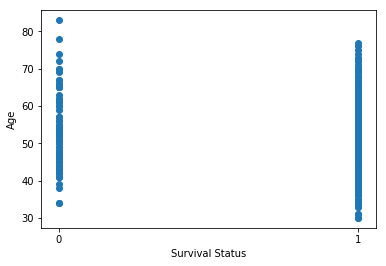

In [59]:
import matplotlib.pyplot as plt

plt.scatter(df.Survival, df.Age);
plt.ylabel('Age')
plt.xlabel('Survival Status')
plt.xticks([0,1]);


In [0]:
age_bins2 = pd.cut(df.Age, 3)
age_bins2_list = set(age_bins2.to_list())

In [75]:
df.groupby(age_bins2).Survival.plot(bins = 1, alpha = 0.5)
plt.xlabel('Survival Status')
plt.ylabel('Count')
plt.xticks([0, 1])
plt.legend(age_bins2_list);

df.plot()

AttributeError: ignored

## Part 3 - Analysis and Interpretation

Now that you've looked at the data, answer the following questions:

### What is at least one feature that looks to have a positive relationship with survival?

There is no feature in the dataset that has a positive relationship with survival. 

###What is at least one feature that looks to have a negative relationship with survival?

Two features have negative relationships with survival:
   * Number of positive axillary nodes 
   * Age

###How are those two features related with each other, and what might that mean?

Note: please see the above table for number of positive nodes vs survival rate
As this number of positive axillary nodes increases, the probability of survival of that patient decreases. We see that patients with 0-10 positive nodes have the highest survival rate based on this dataset. 

This is fairly intuitive given the wikipedia definition of a positive axillary node as a lympy node in the armpit to which cancer has spread. It stands to reason that if you have a large number of these nodes to which cancer has spread your survival rate after an operation to remove them would be low. Potentially the doctor wouldn't be able to get all of them or something along those lines. 


For age, as the age of the patient at the time of operation gets larger, the likelihood of that patient surviving gets lower. 

Again, this is fairly intuitive. We become more frail as we age. If you're 80 and you have a surgery to remove cancerous lymph nodes from your body you'll have a more difficult time than if you were 20 years old. 
